# Modulo V - ARBOLES DE DECISION

<font size="4">
<p>En este modulo se presentará uno de los método más intuitivos para resolver problemas de clasificación.
</p>
<p>Los árboles de decisión se convirtieron en una poderosa herramienta gráfica y analítica para representar todos los eventos que pueden surgir a partir de una decisión asumida en cierto momento.
</p>
<p>En este capítulo veremos la fundamentación probabilistica de los árboles de decisión y cómo está basado en la entropía y la su interpretación desde el punto de vista de teoría de la información
</p>
<p>
El concepto detras de ésta gran idea es  divide y vencerás y es sorprendentemente  poderoso así como simple de entender e interpretar.
</p>
<p>El atributo que debemos escoger para separar las ramas del árbol, debe ser aquella que nos de mayor pureza en la separación. Una medidad estándar de pureza puede ser obtenida con el opuesto de la llamada entropía de shanon.
</p>
<br>

</font>

## Entropía

<font size="4">
<p>La entropía suele considerarse como el grado de desorden de un sistema, es decir, su grado de homogeneidad. </p>
</font>
<br>
<br>
$$
H = - p log_2 (p) - q log_2 (q)
$$

<font size="4">
<p>Supongamos tenemos una moneda cargada hacia la cara (p) y que podemos variar qué tan cargada está entre 0 y 0.5 . </p>
<p>Es decir la probabilidad que salga cara cuando la carga de la moneda es 0 es de 0.5 (igual a que salga sello), y al variar la carga tomará los siguientes posibles valores [0.5, 1], de ésta manera el sello tomará valores [0, 0.5].</p>
<p>Dado ésto grafiquemos la entropía variando 
</font>
<p>
</p>
<br>

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [16]:
p = np.linspace(0.001,0.999,100)
q = [ 1-pi for pi in p ]

In [17]:
def entropy(p):
    q = 1-p
    if p==0 or p==1:
        return 0
    return -p * np.log2(p) - q*np.log2(q)

In [18]:
entropy_p = [ entropy(p[i]) for i in range(len(p)) ]

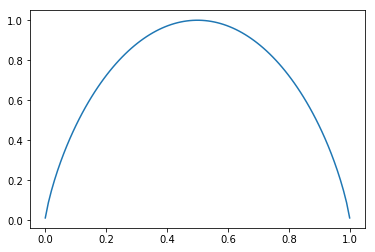

In [19]:
plt.plot(p,entropy_p)

<font size="4">
<p>La medida de purza se representar matemáticamente a través de la cantidad llamada información mutua (o ganancia de información).</p>
<p>La información mutua es la diferencia entre la entropia sin hacer la ramificación y el promedio de la entropia en cada rama resultante.</p>
<p>
</font>
<p>
</p>
$$
I(y, x) = H(y) - [p_{x=0} H(y|x=0) + p_{x=1} H(y|x=1))]
$$
<br>
<font size="4">
<p>
En donde:
</p>
</font>
* y es el conjunto inicial.
* x es el atributo usado para dividir las muestras.
* $H(y∥x=k)H(y‖x=k)$ es la la entropía del subconjunto resultante cuando $x=p$ y $ p_x=k$ es la proporción resultante en la partición obtenida.


In [20]:
def informacion_mutua(y, x):
    res = entropy(y)
    # Particionamos X, con base al criterio x_i
    val, counts = np.unique(x, return_counts=True)
    freqs = counts.astype('float')/len(x)
    for p, v in zip(freqs, val):
        res -= p * entropy(y[x == v])
    return res

<font size="4">
<p><b>Recordemos los pasos en un árbol de decisión.</b></p>
<ol>
<li>Seleccionar el atributo con mayor ganacia de información para dividir las muestras.
<li>Para cada subconjunto, si el subconjunto no es puro continuar dividiendo las muestras.
</ol>

## Ejemplo

In [21]:
clima = pd.DataFrame(columns=['tiempo','humedad','viento','jugar'], index=None)

In [22]:
clima = clima.append({'tiempo': 'caliente','humedad': 'alta'  ,'viento': True, 'jugar':False}, ignore_index=True)
clima = clima.append({'tiempo': 'caliente','humedad': 'normal','viento': True ,'jugar':True} , ignore_index=True)
clima = clima.append({'tiempo': 'caliente','humedad': 'alta'  ,'viento': False,'jugar':True} , ignore_index=True)
clima = clima.append({'tiempo': 'frio'    ,'humedad': 'normal','viento': False,'jugar':True} , ignore_index=True)
clima = clima.append({'tiempo': 'frio'    ,'humedad': 'alta'  ,'viento': True ,'jugar':False} , ignore_index=True)
clima = clima.append({'tiempo': 'frio'    ,'humedad': 'alta'  ,'viento': False,'jugar':False} , ignore_index=True)
clima = clima.append({'tiempo': 'templado','humedad': 'alta'  ,'viento': False,'jugar':True}, ignore_index=True)
clima = clima.append({'tiempo': 'templado','humedad': 'normal','viento': False,'jugar':True} , ignore_index=True)
clima = clima.append({'tiempo': 'templado','humedad': 'alta'  ,'viento': True ,'jugar':False} , ignore_index=True)

In [23]:
clima

tiempo humedad viento  jugar
0  caliente    alta   True  False
1  caliente  normal   True   True
2  caliente    alta  False   True
3      frio  normal  False   True
4      frio    alta   True  False
5      frio    alta  False  False
6  templado    alta  False   True
7  templado  normal  False   True
8  templado    alta   True  False

In [24]:
#busquemos el atributo con mayor ganacia de informacion
#frecuencia de jugar
freq_jugar = float(len(clima[clima['jugar']==True])) / len(clima)
#entropia de jugar sin ramificacion
Hy = entropy( freq_jugar )
#entropia haciendo la ramificacion
#ramificando por tiempo
subset_tiempo_caliente = clima[clima['tiempo']=='caliente']
subset_tiempo_templado = clima[clima['tiempo']=='templado']
subset_tiempo_frio     = clima[clima['tiempo']=='frio']

E_jugar_tiempo = (len(subset_tiempo_caliente)/float(len(clima))) \
                  *entropy( float(len(subset_tiempo_caliente[clima['jugar']==True]))/len(subset_tiempo_caliente) ) 
E_jugar_tiempo += (len(subset_tiempo_templado)/float(len(clima))) \
                  *entropy( float(len(subset_tiempo_templado[clima['jugar']==True]))/len(subset_tiempo_templado) ) 
E_jugar_tiempo += (len(subset_tiempo_frio)/float(len(clima))) \
                  *entropy( float(len(subset_tiempo_frio[clima['jugar']==True]))/len(subset_tiempo_frio) ) 
    
#ramificando por humedad
subset_humedad_alta   = clima[clima['humedad']=='alta']
subset_humedad_normal = clima[clima['humedad']=='normal']

E_jugar_humedad = (len(subset_humedad_alta)/float(len(clima))) \
                  *entropy( float(len(subset_humedad_alta[clima['jugar']==True]))/len(subset_humedad_alta) ) 
E_jugar_humedad += (len(subset_humedad_normal)/float(len(clima))) \
                  *entropy( float(len(subset_humedad_normal[clima['jugar']==True]))/len(subset_humedad_normal) ) 
    
#ramificando por viento
subset_viento_si   = clima[clima['viento']==True]
subset_viento_no   = clima[clima['viento']==False]

E_jugar_viento = (len(subset_viento_si)/float(len(clima))) \
                  *entropy( float(len(subset_viento_si[clima['jugar']==True]))/len(subset_viento_si) ) 
E_jugar_viento += (len(subset_viento_no)/float(len(clima))) \
                  *entropy( float(len(subset_viento_no[clima['jugar']==True]))/len(subset_viento_no) ) 

/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  del sys.path[0]
/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:27: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:28: UserWarning: Boo

In [25]:
E_jugar_tiempo

0.91829583405448956

In [26]:
Hy

0.99107605983822222

In [27]:
subset_humedad_normal

tiempo humedad viento jugar
1  caliente  normal   True  True
3      frio  normal  False  True
7  templado  normal  False  True

In [28]:
print('Ganancia ramificado por la caracteristica tiempo: ', Hy - E_jugar_tiempo)
print('Ganancia ramificado por la caracteristica humedad: ', Hy - E_jugar_humedad)
print('Ganancia ramificado por la caracteristica viento: ', Hy - E_jugar_viento)

Ganancia ramificado por la caracteristica tiempo:  0.0727802257837
Ganancia ramificado por la caracteristica humedad:  0.378878837135
Ganancia ramificado por la caracteristica viento:  0.229436840697


In [29]:
#Las ramas obtenidas son
print(subset_humedad_alta )
print(subset_humedad_normal)

     tiempo humedad viento  jugar
0  caliente    alta   True  False
2  caliente    alta  False   True
4      frio    alta   True  False
5      frio    alta  False  False
6  templado    alta  False   True
8  templado    alta   True  False
     tiempo humedad viento jugar
1  caliente  normal   True  True
3      frio  normal  False  True
7  templado  normal  False  True


<font size="4">
<p><b>Dado que la mejor característica es Humedad la escogemos y repetimos sucesivamente el proceso hasta eliminar la entropía.</b></p>
</font>

## Ejemplo Titanic

<font size="4">
<p>
En este tutorial, utilizaremos el conocido problema del Titanic de Kaggle.</p>
<p>Este caso de estudio se refiere al naufragio del Titanic en 1912. El desastre del Titanic es famoso por estar asociado al histórico código marítimo de salvamento "mujeres y niños primero".
</p>
<p>Ya que el número de botes salvavidas era limitado solo una parte de los pasajeros sobrevivió.
</p>
</font>

### Paso 1. Leer el Dataset

In [16]:
# Imports needed for the script
import numpy as np
import pandas as pd
import re
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
from sklearn import tree
from sklearn.metrics import accuracy_score
from IPython.display import Image as PImage
from subprocess import check_call
from PIL import Image, ImageDraw, ImageFont

# Loading the data
train = pd.read_csv('datasets/titanic-train.csv')

# Store our test passenger IDs for easy access
PassengerId = train['PassengerId']

# Showing overview of the train dataset
train.head(5)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [17]:
# El tipo de boleto del pasajero es una característica informativa
def Ticket_Prefix(s):
    s=s.split()[0]
    if s.isdigit():
        return 'NoClue'
    else:
        return s

train['TicketPrefix'] = train['Ticket'].apply(lambda x: Ticket_Prefix(x))

In [18]:
train.dropna(inplace=True)

In [19]:
# Las variables categoricas es necesario representarlas como numero bajo la representacion one-hot
dummies_Sex=pd.get_dummies(train['Sex'],prefix='Sex')
dummies_Embarked = pd.get_dummies(train['Embarked'], prefix= 'Embarked') 
dummies_Pclass = pd.get_dummies(train['Pclass'], prefix= 'Pclass')
dummies_TicketPrefix = pd.get_dummies(train['TicketPrefix'], prefix='TicketPrefix')
train = pd.concat([train, dummies_Sex, dummies_Embarked, dummies_Pclass, dummies_TicketPrefix], axis=1)
train = train.drop(['Sex','Embarked','Pclass','Name','TicketPrefix'], axis=1)
train.head(5)

PassengerId  Survived   Age  SibSp  Parch    Ticket     Fare Cabin  \
1             2         1  38.0      1      0  PC 17599  71.2833   C85   
3             4         1  35.0      1      0    113803  53.1000  C123   
6             7         0  54.0      0      0     17463  51.8625   E46   
10           11         1   4.0      1      1   PP 9549  16.7000    G6   
11           12         1  58.0      0      0    113783  26.5500  C103   

    Sex_female  Sex_male        ...          TicketPrefix_F.C.  \
1            1         0        ...                          0   
3            1         0        ...                          0   
6            0         1        ...                          0   
10           1         0        ...                          0   
11           1         0        ...                          0   

    TicketPrefix_NoClue  TicketPrefix_PC  TicketPrefix_PP  \
1                     0                1                0   
3                     1                0                0   
6                     1                0                0   
10                    0                0                1   
11                    1                0                0   

    TicketPrefix_S.O./P.P.  TicketPrefix_SC/AH  TicketPrefix_SC/Paris  \
1                        0                   0                      0   
3                        0                   0                      0   
6                        0                   0                      0   
10                       0                   0                      0   
11                       0                   0                      0   

    TicketPrefix_SOTON/O.Q.  TicketPrefix_W.E.P.  TicketPrefix_WE/P  
1                         0                    0                  0  
3                         0                    0                  0  
6                         0                    0                  0  
10                        0                    0                  0  
11                        0                    0                  0  

[5 rows x 27 columns]

In [20]:
df = train.set_index(['PassengerId'])
# Create Numpy arrays of train, test and target (Survived) dataframes to feed into our models
y_train = train['Survived']
x_train = train.drop(['Survived','Cabin','Ticket','PassengerId'], axis=1).values 

# Create Decision Tree with max_depth = 3
decision_tree = tree.DecisionTreeClassifier(max_depth = 3)
decision_tree.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

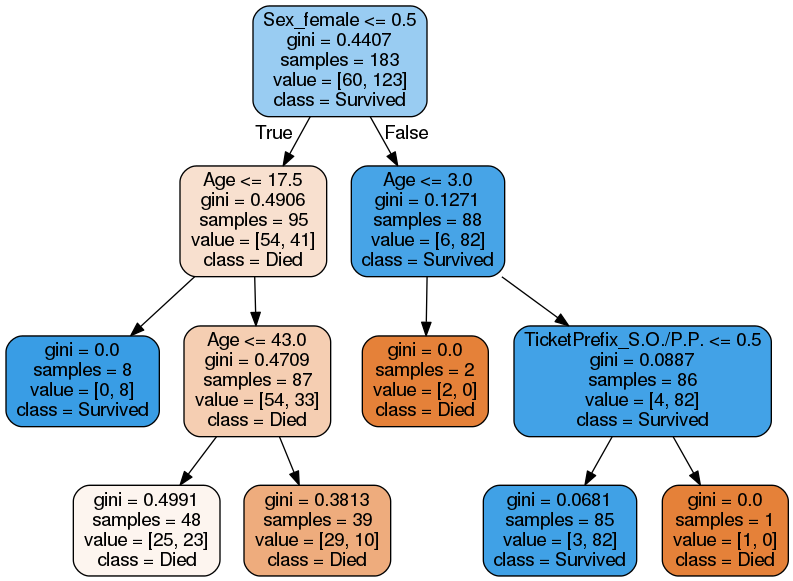

In [321]:

# Exportar el modelo a .dot
with open("tree1.dot", 'w') as f:
     f = tree.export_graphviz(decision_tree,
                              out_file=f,
                              max_depth = 6,
                              impurity = True,
                              feature_names = list(train.drop(['Survived','Cabin','Ticket','PassengerId'], axis=1)),
                              class_names = ['Died', 'Survived'],
                              rounded = True,
                              filled= True )
        
#Convertir a png
check_call(['dot','-Tpng','tree1.dot','-o','tree1.png'])

# Anotar la imagen
img = Image.open("tree1.png")
draw = ImageDraw.Draw(img)
font = ImageFont.truetype('/usr/share/fonts/truetype/liberation/LiberationSerif-Bold.ttf', 26)
draw.text((10, 0), # Drawing offset (position)
          '', # Text to draw
          (0,0,255), # RGB desired color
          font=font) # ImageFont object with desired font
img.save('sample-out.png')
PImage("sample-out.png")

## Taller 1
<br>
<font size="4">
<p>
Ejecute un clasificar sklearn basado en arboles de decision que permita clasificar buenos clientes y malos clientes para el problema de entrega de créditos visto en el módulo de de Ingeniería de Características.
</p>
</font>

<br>
## Quiz 1
<br>
<font size="4">
<ol>
<li>¿Qué relación existe entre la entropía y la ganancia de información?
<li>¿Cuando se está encontrando el árbol de decisión cuál es la condición de parada para no explorar más una rama?
</font>


# Referencias

* Raschka, S. (2015). Python machine learning. Packt Publishing Ltd.
* Biggs, D., De Ville, B., & Suen, E. (1991). A method of choosing multiway partitions for classification and decision trees. Journal of Applied Statistics, 18(1), 49-62.
* Quinlan, J. R. (1986). Induction of decision trees. Machine learning, 1(1), 81-106.
* "How to Create Classification and Regression Trees in Python for Data Science." Dummies. N.p., n.d. Web. 03 Aug. 2017.
* Murphy, K. P. (2013). Machine learning: a probabilistic perspective. Cambridge, Mass.: MIT Press.
* Sugiyama, M. (2016). Introduction to statistical machine learning. Waltham, Ma.: Morgan Kaufmann, Elsevier.
* Titanic: Machine Learning from Disaster | Kaggle. N.p., n.d. Web. 03 Aug. 2017.
* Safavian, S. R., & Landgrebe, D. (1991). A survey of decision tree classifier methodology. IEEE transactions on systems, man, and cybernetics, 21(3), 660-674.
* Building Decision Tree Algorithm in Python with scikit learn. (2017, February 19). Retrieved August 03, 2017, from http://dataaspirant.com/2017/02/01/decision-tree-algorithm-python-with-scikit-learn/
* Deshpande, B. (n.d.). A simple explanation of how entropy fuels a decision tree model. Retrieved August 03, 2017, from http://www.simafore.com/blog/bid/94454/A-simple-explanation-of-how-entropy-fuels-a-decision-tree-model